In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [14]:
%matplotlib inline

In [15]:
# Load dataset
try: 
    data = pd.read_csv("Wholesale.csv")
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except FileNotFoundError:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [16]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [18]:
# Show column names
display(data.columns)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [19]:
# Quartile values
fresh_q1, fresh_q3 = 3127.75, 16933.75
milk_q1, milk_q3 = 1533, 7190.25
grocery_q1, grocery_q3 = 2153, 10655.75
frozen_q1, frozen_q3 = 742.25, 3554.25
deter_q1, deter_q3 = 256.75, 3922
deli_q1, deli_q3 = 408.25, 1820.25

In [20]:
# Sample filters (for reference)
high_grocery_milk_low_deli_fresh = data[
    (data.Grocery > grocery_q3) & 
    (data.Milk > milk_q3) & 
    (data.Delicassen < deli_q1) & 
    (data.Fresh < fresh_q1)
]

high_fresh_frozen_low_grocery = data[
    (data.Fresh > fresh_q3) & 
    (data.Frozen > frozen_q3) & 
    (data.Grocery < grocery_q1)
]

high_deli_low_frozen_fresh = data[
    (data.Delicassen > deli_q3) & 
    (data.Frozen < frozen_q1) & 
    (data.Fresh < fresh_q1)
]

# Selected sample indices
indices = [109, 283, 315]
samples = pd.DataFrame(data.loc[indices], columns=data.columns).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

# Add mean for comparison
data_mean = data.describe().loc['mean', :]
samples_bar = pd.concat([samples, pd.DataFrame([data_mean])], ignore_index=True)
samples_bar.index = indices + ['mean']

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1406,16729,28986,673,836,3
1,25767,3613,2013,10303,314,1384
2,1479,14982,11924,662,3891,3508


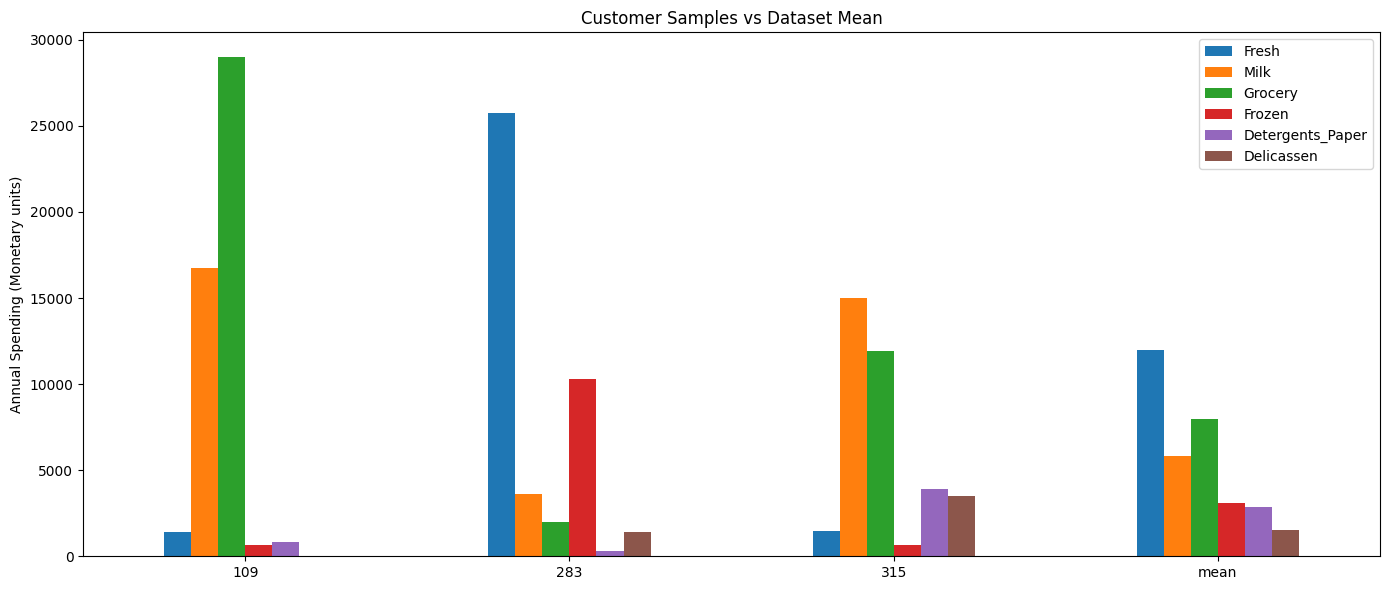

In [21]:
# Plot comparison
samples_bar.plot(kind='bar', figsize=(14, 6))
plt.title("Customer Samples vs Dataset Mean")
plt.ylabel("Annual Spending (Monetary units)")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.3857497102040739
R2 score for Milk as dependent variable: 0.15627539501732113
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


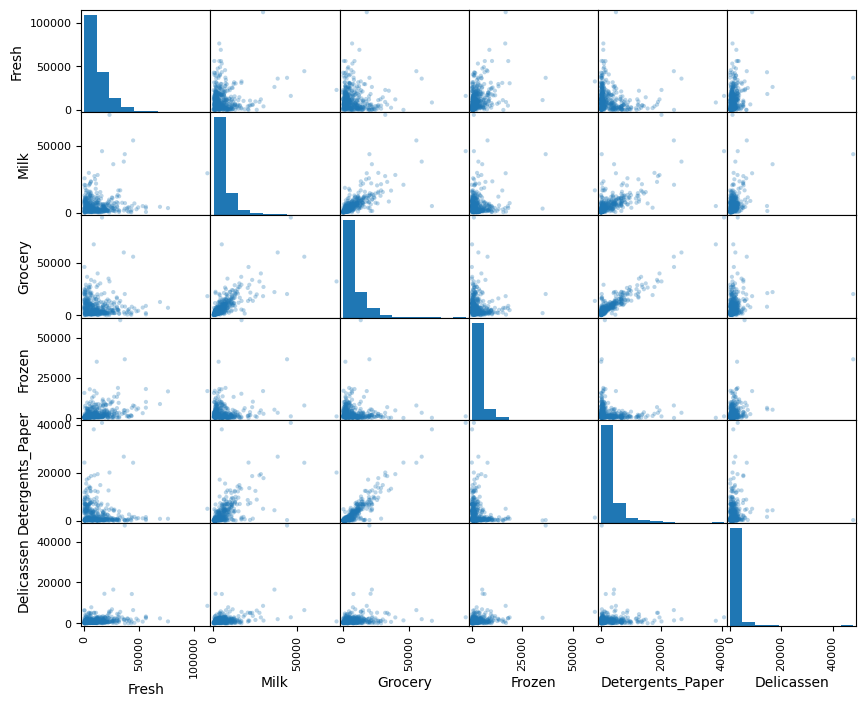

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.3, figsize=(10, 8))
plt.show()


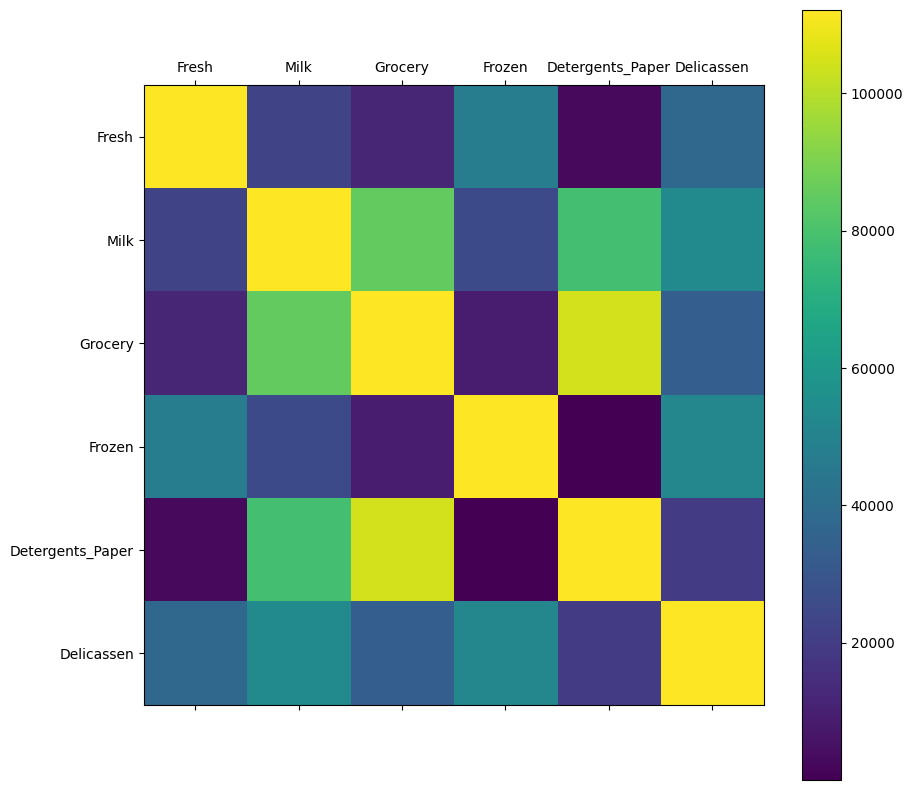

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

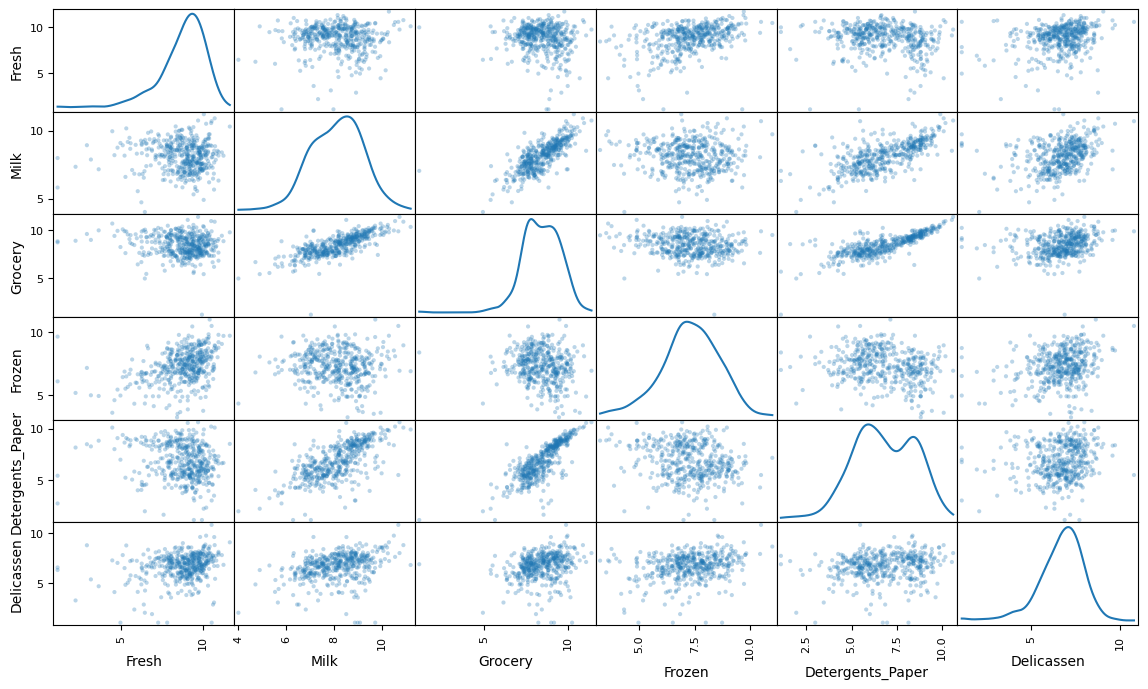

In [30]:
from pandas.plotting import scatter_matrix
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde');

In [31]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
1,10.156850,8.192294,7.607381,9.240190,5.749393,7.232733
2,7.299121,9.614605,9.386308,6.495266,8.266421,8.162801


In [32]:
from scipy import stats

# Keep outlier indices in a list and examine after looping thru the features
idx = []


# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Gather the indexes of all the outliers
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()

print(sorted(idx))
 
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

#outliers = list(unique_everseen(idx))

import collections

outliers = [item for item, count in collections.Counter(idx).items() if count > 1]


print(sorted(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


print(log_data.shape)
print(good_data.shape)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
[65, 66, 75, 128, 154]
(440, 6)
(435, 6)


In [37]:
def pca_results(good_data, pca):
    """
    Create a DataFrame of the PCA results, including component weights
    and explained variance. Also display a heatmap of the components.
    """
    dimensions = ['Dimension {}'.format(i + 1) for i in range(len(pca.components_))]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.columns)
    components.index = dimensions

    # Explained variance
    variance_ratios = pd.DataFrame(np.round(pca.explained_variance_ratio_, 4),
                                   index=dimensions,
                                   columns=['Explained Variance'])

    # Plot the PCA component weights as a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(components, annot=True, cmap='coolwarm')
    plt.title("PCA Component Weights")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return pd.concat([variance_ratios, components], axis=1)


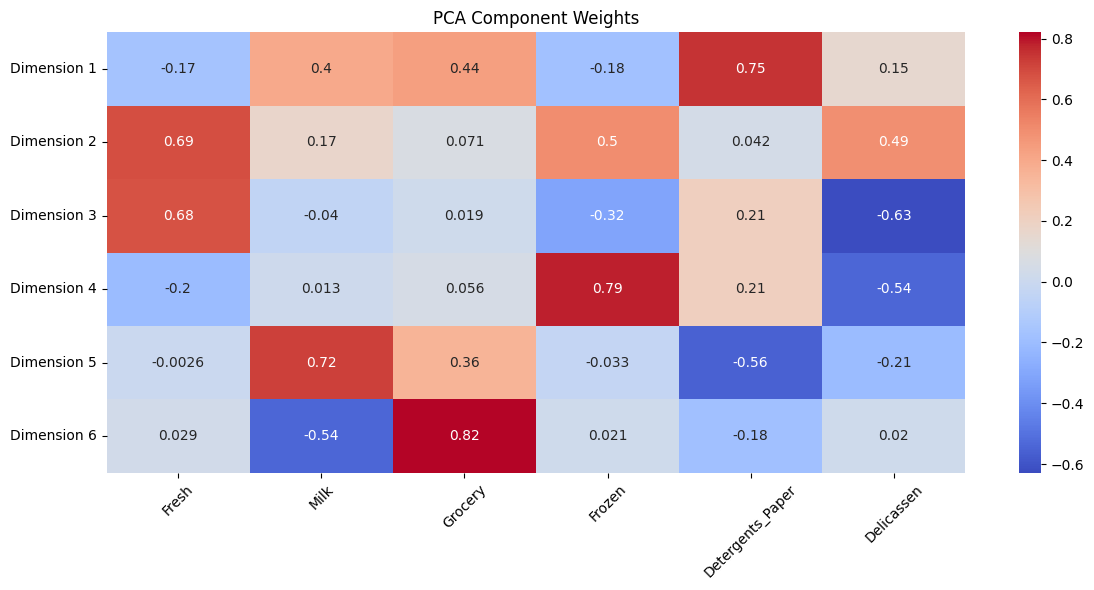

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,0.6774,-0.0402,0.0195,-0.3150,0.2117,-0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197



Cumulative Explained Variance:
[0.44302505 0.70681723 0.82988103 0.93109011 0.97959207 1.        ]


In [38]:
from sklearn.decomposition import PCA

# Apply PCA to the good data with 6 components
pca = PCA(n_components=6).fit(good_data)

# Transform the sample data using the PCA
pca_samples = pca.transform(log_samples)

# Display the PCA results
pca_results_df = pca_results(good_data, pca)
display(pca_results_df)

# Cumulative explained variance
print('\nCumulative Explained Variance:')
print(np.cumsum(pca.explained_variance_ratio_))


In [40]:
from sklearn.decomposition import PCA

# Reduce the log-transformed data to 2 dimensions with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(log_data)

# Also transform your sample data using the same PCA model
pca_samples = pca.transform(log_samples)

7 clusters: 0.33917
6 clusters: 0.31715
5 clusters: 0.34619
4 clusters: 0.33032
3 clusters: 0.32309
2 clusters: 0.41971


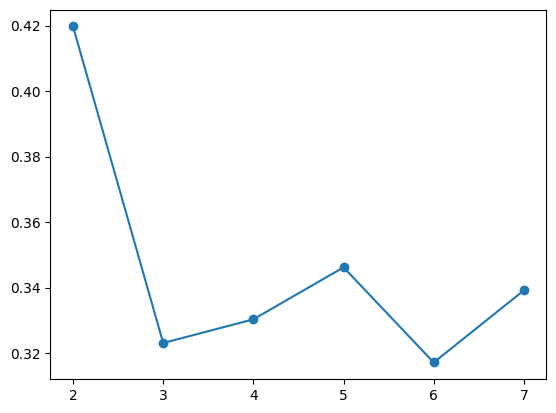

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#keep the scores for each cluster size
sil_scores = []

random_state = 7

for i in range(7,1,-1):
    clusterer = KMeans(i, random_state=random_state).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    sil_scores.append(score)
    print(i, 'clusters:', score.round(5))

# plot the scores
import matplotlib.pyplot as plt
_ = plt.plot(np.arange(7,1,-1), sil_scores, '-o')

In [44]:
def cluster_results(reduced_data, preds, centers, sample_data):
    """
    Visualizes the PCA-reduced cluster data, cluster centers, and sample points.
    """
    plt.figure(figsize=(10, 6))

    # Create a DataFrame for plotting
    df = pd.DataFrame(reduced_data, columns=["Dimension 1", "Dimension 2"])
    df['Cluster'] = preds

    # Plot the cluster assignments
    sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cluster",
                    palette='Set1', s=50, alpha=0.6, legend='full')

    # Plot the cluster centers
    centers = np.array(centers)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centers')

    # Plot the sample points
    sample_data = np.array(sample_data)
    plt.scatter(sample_data[:, 0], sample_data[:, 1], c='yellow', edgecolor='black',
                s=200, marker='D', label='Samples')

    plt.title("Cluster Assignments and Centers (PCA-Reduced Data)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

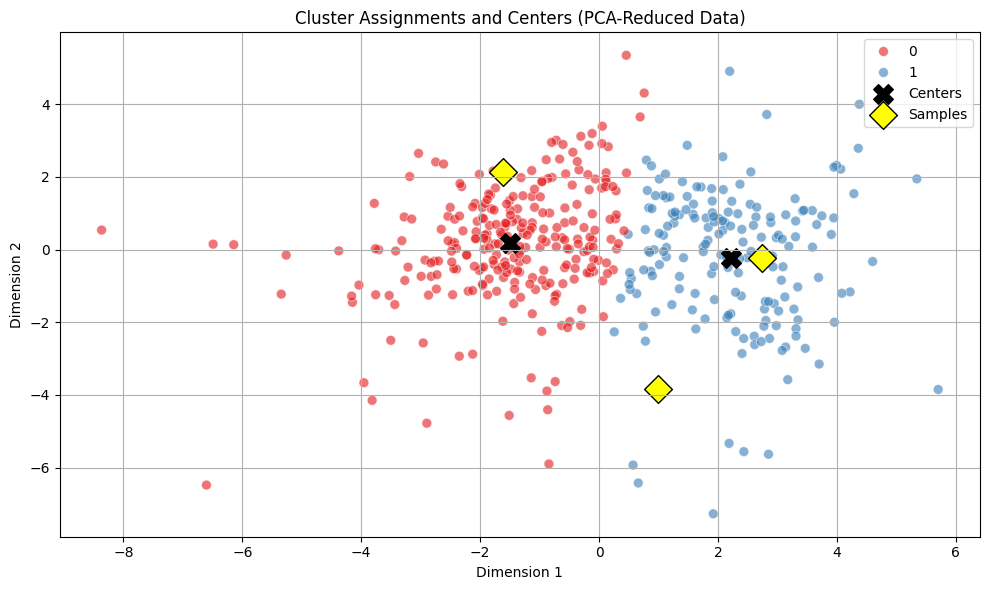

In [45]:
cluster_results(reduced_data, preds, centers, pca_samples)

In [46]:
def biplot(log_data, reduced_data, pca):
    """
    Creates a biplot showing the reduced data and vectors for the original features.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot of the reduced data
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.4, color='teal', s=30)

    # Feature vectors (scaled for display)
    feature_vectors = pca.components_.T
    for i, feature in enumerate(log_data.columns):
        ax.arrow(0, 0,
                 feature_vectors[i, 0]*3,  # Scale factor for visibility
                 feature_vectors[i, 1]*3,
                 color='red',
                 head_width=0.1,
                 head_length=0.1)
        ax.text(feature_vectors[i, 0]*3.2, feature_vectors[i, 1]*3.2,
                feature, color='black', ha='center', va='center', fontsize=9)

    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_title("Biplot of PCA-Reduced Data with Feature Vectors")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

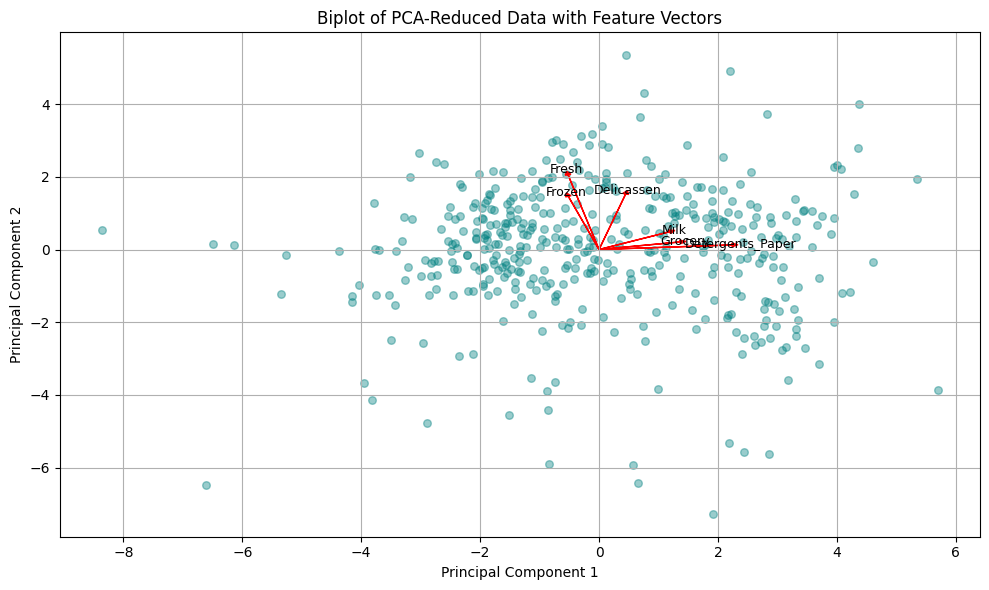

In [47]:
biplot(log_data, reduced_data, pca)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8991.0,1915.0,2374.0,2080.0,292.0,683.0
Segment 1,3553.0,7774.0,12516.0,896.0,4601.0,965.0



Average purchase costs for each category:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64


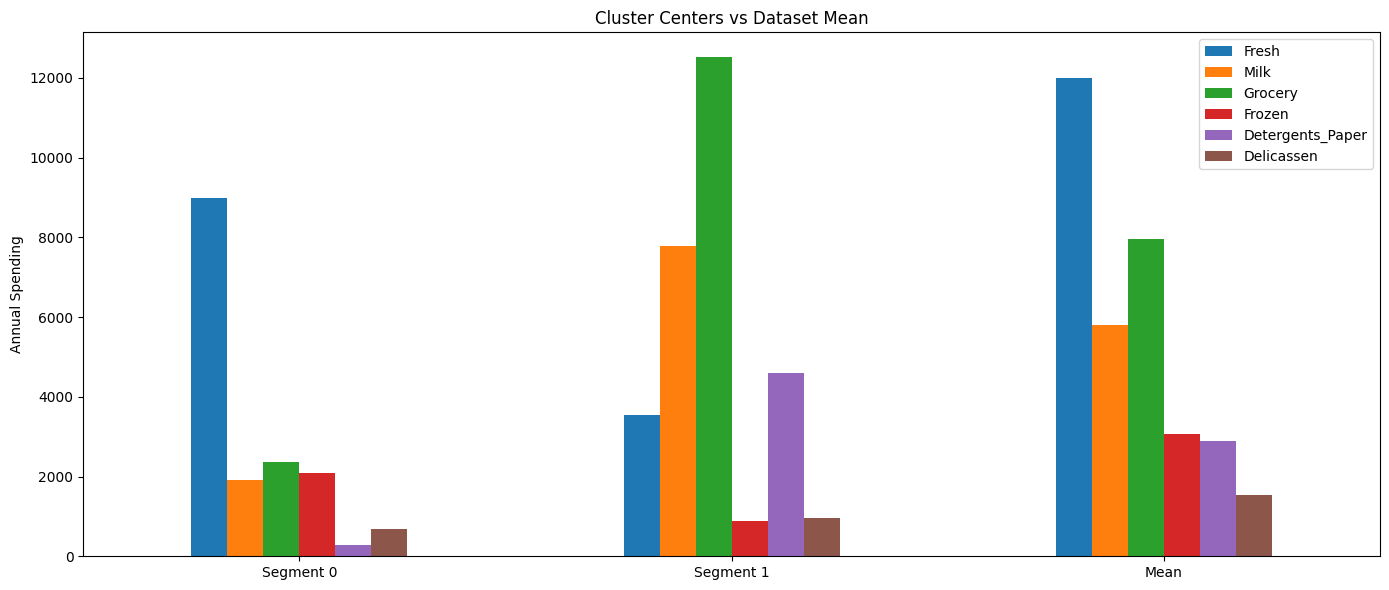

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [48]:
# Inverse transform cluster centers back to log space and then original space
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

# Create labeled DataFrame for centers
segments = [f"Segment {i}" for i in range(len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.columns, index=segments)

# Display true centers
display(true_centers)

# Average purchase cost (safely calculated using .mean())
print("\nAverage purchase costs for each category:")
print(data.mean())

# Visualize cluster centers vs dataset mean
mean_row = data.describe().loc['mean']
true_centers_bar = pd.concat([true_centers, pd.DataFrame([mean_row], index=['Mean'])])

# Plot
true_centers_bar.plot(kind='bar', figsize=(14, 6))
plt.title("Cluster Centers vs Dataset Mean")
plt.ylabel("Annual Spending")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print sample cluster assignments
for i, pred in enumerate(sample_preds):
    print(f"Sample point {i} predicted to be in Cluster {pred}")